# Python 明星包：PyPortfolioOpt投资组合

> **作者**：<吕卓阳>  
> **邮箱**：<lvzy20@163.com>

&emsp; 

- **Title**: Python 明星包：PyPortfolioOpt投资组合优化分析
- **Keywords**: PyPortfolioOpt, Python, 投资组合优化, 量化投资, 风险管理

---

> Martin, R. (2021). PyPortfolioOpt: portfolio optimization in Python. Journal of Open Source Software, 6(61), 3066. [Link](https://doi.org/10.21105/joss.03066), [PDF](https://www.theoj.org/joss-papers/joss.03066/10.21105.joss.03066.pdf), [Google](<https://scholar.google.com/scholar?q=PyPortfolioOpt: portfolio optimization in Python>).

- **项目主页：** <https://pyportfolioopt.readthedocs.io/>
- **GitHub地址：** <https://github.com/robertmartin8/PyPortfolioOpt>




&emsp;

### 1. PyPortfolioOpt介绍

近期，由Robert Martin开发的一个开源Python库引起了量化投资界的广泛关注——**PyPortfolioOpt投资组合优化库**。PyPortfolioOpt是一个专门实现投资组合优化方法的Python工具包，涵盖了从马科维茨经典均值-方差优化到Black-Litterman模型的各类方法，以及分层风险平价(HRP)等前沿算法。该库构建了覆盖300多种优化技术的功能模块，这些方法涉及预期收益估计、风险建模、目标函数设计、约束条件设置等多个维度，并包含详细的理论基础和实际应用案例。

![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/lvzhuoyang_B810_Fig01.png)

这一工具包覆盖了从传统资产配置到现代风险平价的全谱投资组合构建方法，提供了资产权重优化和风险控制的全面视角。它可以为量化研究人员提供跨资产类别、跨国比较和投资策略构建的基础工具。

**GitHub地址：** https://github.com/robertmartin8/PyPortfolioOpt

该项目已在《开源软件杂志》(Journal of Open Source Software)上[发表论文](https://joss.theoj.org/papers/10.21105/joss.03066)，目前由 [Tuan Tran](https://github.com/88d52bdba0366127fffca9dfa93895) 负责维护。项目在ReadTheDocs上提供了完整的技术文档，同时在 [cookbook](https://github.com/robertmartin8/PyPortfolioOpt/tree/master/cookbook) 中展示了从数据获取到组合构建的完整工作流程。

### 2. PyPortfolioOpt安装与使用

PyPortfolioOpt支持多种安装方式。最简单的方法是直接从PyPI安装，只需运行`pip install PyPortfolioOpt`。需要注意的是，macOS用户需要安装命令行工具，Windows用户需要先安装C++。为了更好的依赖管理，推荐使用Poetry，运行`poetry add PyPortfolioOpt`即可。

该库还支持Docker部署，可以构建容器并运行iPython解释器、Jupyter notebook服务器或进行测试。对于开发用途，可以直接克隆 GitHub 仓库或在命令行终端执行如下命令：



```
pip install PyPortfolioOpt
```




### 快速示例

以下是一个使用 PyPortfolioOpt [使用文档页面](https://github.com/robertmartin8/PyPortfolioOpt) 的美股个股的示例数据的示例，展示了如何找到最大化夏普比率的多头投资组合：



In [5]:

import pandas as pd
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Read in price data
data_url = "https://raw.githubusercontent.com/lianxhcn/data/refs/heads/main/B810_stock_prices.csv"
df = pd.read_csv(data_url, parse_dates=True, index_col="date")

# data information 
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7126 entries, 1989-12-29 to 2018-04-11
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOG    3435 non-null   float64
 1   AAPL    7126 non-null   float64
 2   FB      1483 non-null   float64
 3   BABA    896 non-null    float64
 4   AMZN    5261 non-null   float64
 5   GE      7126 non-null   float64
 6   AMD     7126 non-null   float64
 7   WMT     7126 non-null   float64
 8   BAC     7126 non-null   float64
 9   GM      1860 non-null   float64
 10  T       7126 non-null   float64
 11  UAA     3118 non-null   float64
 12  SHLD    3763 non-null   float64
 13  XOM     7126 non-null   float64
 14  RRC     6369 non-null   float64
 15  BBY     7126 non-null   float64
 16  MA      2990 non-null   float64
 17  PFE     7126 non-null   float64
 18  JPM     7126 non-null   float64
 19  SBUX    6496 non-null   float64
dtypes: float64(20)
memory usage: 1.1 MB
None
            GOO

In [6]:

# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)


OrderedDict({'GOOG': 0.0458, 'AAPL': 0.06743, 'FB': 0.2008, 'BABA': 0.08494, 'AMZN': 0.03525, 'GE': 0.0, 'AMD': 0.0, 'WMT': 0.0, 'BAC': 0.0, 'GM': 0.0, 'T': 0.0, 'UAA': 0.0, 'SHLD': 0.0, 'XOM': 0.0, 'RRC': 0.0, 'BBY': 0.01587, 'MA': 0.3287, 'PFE': 0.20394, 'JPM': 0.0, 'SBUX': 0.01726})
Expected annual return: 29.9%
Annual volatility: 21.8%
Sharpe Ratio: 1.38


(0.29944709161230304, 0.21764331681393406, 1.375861643701672)



该代码输出的权重分配结果显示，MA(万事达卡)获得最高权重35.3%，FB(Meta)获得20.6%权重，PFE(辉瑞)获得19.6%权重，而许多股票权重为0。预期年化收益率为30.5%，年化波动率为22.2%，夏普比率为1.28。


```python
OrderedDict({'GOOG': 0.0458, 'AAPL': 0.06743, 'FB': 0.2008, 'BABA': 0.08494, 'AMZN': 0.03525, 'GE': 0.0, 'AMD': 0.0, 'WMT': 0.0, 'BAC': 0.0, 'GM': 0.0, 'T': 0.0, 'UAA': 0.0, 'SHLD': 0.0, 'XOM': 0.0, 'RRC': 0.0, 'BBY': 0.01587, 'MA': 0.3287, 'PFE': 0.20394, 'JPM': 0.0, 'SBUX': 0.01726})
Expected annual return: 29.9%
Annual volatility: 21.8%
Sharpe Ratio: 1.38
(0.29944709161230304, 0.21764331681393406, 1.375861643701672)
```

更实用的功能是将连续权重转换为实际可购买的离散分配。通过输入最新价格和期望的投资组合规模，可以得到具体的股票购买数量：



In [8]:

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=10000)
allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))


Discrete allocation: {'MA': 19, 'PFE': 57, 'FB': 12, 'BABA': 4, 'AAPL': 4, 'GOOG': 1, 'SBUX': 2, 'BBY': 2}
Funds remaining: $17.46


```

结果显示，在1万美元的投资组合中，应购买19股MA、57股PFE、12股FB、4股BABA、4股AAPL、1股GOOG、2股SBUX和2股BBY，剩余资金为17.46美元。

```
Discrete allocation: {'MA': 19, 'PFE': 57, 'FB': 12, 'BABA': 4, 'AAPL': 4, 'GOOG': 1, 'SBUX': 2, 'BBY': 2}
Funds remaining: $17.46
```



## 3. 理论介绍

### 3.1 现代投资组合理论（MPT）

Markowitz (1952)提出的均值-方差优化是投资组合理论的基石。其核心定义是通过数学优化方法在投资组合的预期收益和风险之间寻找最优平衡。该理论将投资决策从传统的单一资产分析转向整体投资组合的系统性分析，强调资产间的相互作用对整体风险收益特征的决定性影响。

投资组合的预期收益和风险可以用数学表述如下：

$r_p = \sum_{i=1}^{n} w_i \mu_i = w^T\mu$，

$\sigma_p^2 = \sum_{i=1}^{n}\sum_{j=1}^{n} w_i w_j \sigma_{ij} = w^T\Sigma w$

其中$w_i$表示资产$i$的权重，$\mu_i$表示资产$i$的预期收益率。$\sigma_{ij}$是资产$i$和$j$的协方差，$\Sigma$是$n \times n$的协方差矩阵。

寻找最优投资组合即可以使用数学中的优化问题进行求解。第一种是在给定目标收益率的约束下最小化风险：$\min_w w^T\Sigma w$ subject to $w^T\mu = \mu_{\text{target}}$, $w^T\mathbf{1} = 1$, $w \geq 0$。第二种是在给定风险容忍度的约束下最大化收益：$\max_w w^T\mu - \frac{\lambda}{2}w^T\Sigma w$ subject to $w^T\mathbf{1} = 1$, $w \geq 0$，其中$\lambda$是风险厌恶参数。这两种表述在数学上是等价的，都属于凸二次规划问题，可以通过拉格朗日乘数法求得解析解。

求解过程涉及构建拉格朗日函数，对权重向量求偏导并令其为零，得到一阶必要条件。在没有不等式约束的情况下，最优权重的解析解为：$w^* = \frac{\Sigma^{-1}\mu}{\mathbf{1}^T\Sigma^{-1}\mu}$（最小方差组合）或更一般的形式涉及两个基础组合的线性组合。通过改变目标收益率或风险厌恶参数，可以得到一系列最优投资组合，这些组合在均值-方差平面上构成一条向上凸的曲线，称为有效前沿。

![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/lvzhuoyang_B810_Fig02.png)

传统MPT方法的主要缺点集中在参数估计和实际应用的困难上。首先是预期收益估计的高度不确定性，历史平均收益作为未来预期收益的代理变量具有巨大的估计误差，而优化过程会放大这些误差，导致所谓的"误差最大化"现象。优化器倾向于给那些历史收益率高但可能包含大量噪声的资产分配过高权重。其次是协方差矩阵估计的样本偏差，当资产数量接近或超过历史观测期数时，样本协方差矩阵变得奇异或近似奇异，导致数值不稳定。第三是模型假设的限制性，如正态分布假设、单期模型假设、交易成本忽略等都与现实相去甚远。第四是权重集中度问题，优化结果常常导致投资组合过度集中在少数几个资产上，违背了分散化投资的直觉。

### 3.2 Black-Litterman模型

Black-Litterman模型由费舍尔·布莱克和罗伯特·利特曼在1990年提出，其核心是通过贝叶斯框架将市场均衡隐含的收益预期与投资者主观观点相结合，解决传统马科维茨优化中预期收益估计不稳定的问题。Black-Litterman公式的完整表述为：$$E(R) = [(\tau\Sigma)^{-1} + P^T\Omega^{-1}P]^{-1}[(\tau\Sigma)^{-1}\Pi + P^T\Omega^{-1}Q]$$，其中$\tau$是标量参数，$P$是观点矩阵，$\Omega$是观点不确定性矩阵，$Q$是观点向量。该模型的理论基础建立在市场有效性假设之上，认为观察到的市场资本化权重包含了所有市场参与者对各资产预期收益的集体智慧。

模型的核心原理是从市场均衡条件反推隐含预期收益作为先验信息。根据CAPM理论，市场组合代表均衡状态下的最优配置，因此可以通过公式$\Pi = \delta \Sigma w_{mkt}$从市场权重$w_{mkt}$反推出市场隐含的预期收益$\Pi$，其中$\delta$是风险厌恶系数。这个隐含收益向量代表了市场对各资产的"共识预期"，相比历史平均收益具有更好的稳定性。

投资者的主观观点通过观点矩阵$P$和观点向量$Q$表达，可以是绝对观点（某资产的预期收益）或相对观点（某资产相对其他资产的超额收益）。模型通过贝叶斯更新将市场共识与投资者观点融合，得到调整后的预期收益$\mu_{BL}$。关键参数包括$\tau$（控制对市场先验的信心）和$\Omega$（反映对主观观点的信心）。

Black-Litterman模型解决的核心问题是传统优化中的"估计误差最大化"现象。当投资者没有明确观点时，模型自动回归市场权重，避免了极端配置；当有强烈观点时，配置会相应偏离市场，偏离程度取决于观点的强度和置信度。

### 3.3 分层风险平价（HRP）

分层风险平价算法由马科斯·洛佩斯·德·普拉多在2016年提出，其核心是通过机器学习的层次聚类技术构建投资组合，完全避开传统优化中的矩阵求逆运算。该算法针对传统均值-方差优化的数值不稳定性问题提供了全新的解决思路。

HRP算法的核心原理基于对传统优化问题的深刻洞察：当资产数量增加或资产间高度相关时，协方差矩阵变得接近奇异，矩阵求逆过程会显著放大估计误差，导致权重的剧烈波动。HRP通过识别资产间的层次相关结构，采用自上而下的递归风险分配，在不进行矩阵求逆的情况下实现有效的风险分散。

算法包含三个核心步骤：首先使用相关性距离$d_{ij} = \sqrt{\frac{1}{2}(1-\rho_{ij})}$对资产进行层次聚类，构建反映资产相似性的树状结构；其次根据聚类结果重新排列协方差矩阵，使其呈现块对角结构；最后从聚类树的根节点开始递归二分，对每层的两个子簇按风险平价原则分配权重：$w_A = \frac{\sigma_B}{\sigma_A + \sigma_B}$，$w_B = \frac{\sigma_A}{\sigma_A + \sigma_B}$确保各子簇的风险贡献相等。

HRP算法解决的主要问题是传统优化方法对估计误差的敏感性和数值不稳定性。通过完全避免矩阵求逆，算法对协方差估计误差具有天然的鲁棒性。层次聚类结构有效利用了资产收益的相关性模式，在保持分散化的同时避免过度分散。从机器学习角度看，HRP相当于一种结构化正则化方法，通过引入层次约束防止过拟合，提升样本外表现的稳定性。



## 4. 应用介绍

PyPortfolioOpt的设计遵循模块化原则，用户可以灵活替换各个组件。该库提供四大核心功能模块，彼此紧密关联又相对独立。在这里我们使用akshare包调用中国的几只个股数据，关于akshare包的使用可以参考如下推文：

 - 张祖冲, 2025, [akshare 与 Python：中国金融数据分析与获取的开源首选工具](https://www.lianxh.cn/details/1642.html)
 - 申维冰, 2022, [金融数据哪里找——Akshare数据平台](https://www.lianxh.cn/details/958.html)

### 4.1 预期收益估计

预期收益的准确估计是投资组合优化的关键输入。PyPortfolioOpt提供多种估计方法，包含三个核心预测函数：

- `mean_historical_return()`：用于计算历史平均收益率，
- `ema_historical_return()`：实现指数加权移动平均收益率，
- `capm_return()`：基于资本资产定价模型计算预期收益。

此外，还包含一些辅助函数如 `prices_from_returns` 和 `returns_from_prices` 用于价格和收益率之间的转换，以及`_check_returns` 等内部验证函数。

以历史收益率方法为例：



In [12]:
import akshare as ak
import pandas as pd
from pypfopt import expected_returns

# 使用akshare包获取几只个股数据
stock_codes = ['000002', '600519', '000858', '600036', '601318']
price_data = {}
for code in stock_codes:
    df = ak.stock_zh_a_hist(symbol=code, 
                            period="daily", 
                            start_date="20200101", 
                            end_date='20250101', 
                            adjust="qfq")
    price_data[code] = df.set_index('日期')['收盘']
df = pd.DataFrame(price_data)
df.index = pd.to_datetime(df.index)

# 创建市场基准数据（这里用所有股票的等权重组合作为市场代理）
market_prices = df.mean(axis=1).to_frame(name='market')

# 使用CAPM方法估计预期收益
mu_capm = expected_returns.capm_return(df, 
                                       market_prices=market_prices, 
                                       risk_free_rate=0.02)

print(f"\n平均预期收益率: {mu_capm.mean():.4f}")
print(f"收益率标准差: {mu_capm.std():.4f}")
print(f"最高预期收益股票: {mu_capm.idxmax()} ({mu_capm.max():.4f})")
print(f"最低预期收益股票: {mu_capm.idxmin()} ({mu_capm.min():.4f})")



平均预期收益率: 0.0690
收益率标准差: 0.0199
最高预期收益股票: 000858 (0.0938)
最低预期收益股票: 000002 (0.0502)




运行这段代码后，会得到每只A股基于CAPM模型的预期年化收益率。结果显示，五只股票的平均预期收益率为6.90%，其中万科A（000002）预期收益率最低为5.02%，五粮液（000858）预期收益率最高达9.38%。这些数值反映了各股票相对于市场基准的风险调整收益水平。贝塔系数高的股票（与市场相关性强且波动更大）会显示更高的预期收益，而贝塔系数低的股票则显示相对保守的预期收益。从标准差0.0199可以看出，这五只股票的预期收益率分布较为集中，风险特征相对均衡。



### 4.2 风险模型

协方差矩阵不仅编码资产的波动性，还包含资产间的相关性信息。为了获得分散化收益，投资组合中的资产应尽可能不相关。样本协方差矩阵是最常用的标准方法，计算相对简单且无偏，但估计误差较大，在均值-方差优化中容易导致过度权重分配给错误估计。半方差专注于下行风险的度量，指数协方差对近期数据赋予更多权重。协方差收缩技术将样本协方差矩阵与结构化估计量结合，减少错误权重的影响。PyPortfolioOpt提供了基于sklearn.covariance的高效向量化实现，包括手动收缩、Ledoit-Wolf收缩(提供constant_variance、single_factor和constant_correlation三种目标)以及Oracle近似收缩。最小协方差行列式提供协方差的稳健估计。



In [15]:

from pypfopt import risk_models

# 使用相同的股票数据
stock_codes = ['000002', '600519', '000858', '600036', '601318']
price_data = {}
for code in stock_codes:
    df = ak.stock_zh_a_hist(symbol=code, 
                            period="daily", 
                            start_date="20200101", 
                            end_date='20250101', 
                            adjust="qfq")
    price_data[code] = df.set_index('日期')['收盘']
df = pd.DataFrame(price_data)
df.index = pd.to_datetime(df.index)

# 计算样本协方差矩阵
S = risk_models.sample_cov(df)

# 显示相关性最高和最低的股票对
correlation_matrix = S.div(S.index.to_series().apply(lambda x: S.loc[x,x]**0.5), axis=0).div(S.columns.to_series().apply(lambda x: S.loc[x,x]**0.5), axis=1)
corr_values = correlation_matrix.where(correlation_matrix != 1).stack().dropna()
print(f"\n最高相关性: {corr_values.max():.3f}")
print(f"最低相关性: {corr_values.min():.3f}")



最高相关性: 0.835
最低相关性: 0.325




样本协方差矩阵直接从历史价格数据计算得出，反映了各A股资产的历史波动特征和相互关系。结果显示，五只A股中相关性最高的是0.835；而相关性最低0.325。这些相关性信息为构建风险分散的投资组合提供了定量依据，低相关性的资产组合能更有效地降低整体投资风险。



### 4.3 投资组合优化目标

EfficientFrontier类提供了多种优化目标函数，最常用的是最大夏普比率优化，它寻找单位风险下收益最高的投资组合：



In [18]:

from pypfopt import EfficientFrontier

# 计算预期收益和协方差矩阵
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# 最大夏普比率优化
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

print("最大夏普比率组合权重:")
for stock, weight in cleaned_weights.items():
    if weight > 0.01:  # 只显示权重大于1%的股票
        print(f"{stock}: {weight:.3f} ({weight*100:.1f}%)")

# 显示组合表现指标
performance = ef.portfolio_performance(verbose=False)
print(f"\n预期年化收益: {performance[0]:.3f} ({performance[0]*100:.1f}%)")
print(f"年化波动率: {performance[1]:.3f} ({performance[1]*100:.1f}%)")
print(f"夏普比率: {performance[2]:.3f}")


最大夏普比率组合权重:
600519: 1.000 (100.0%)

预期年化收益: 0.106 (10.6%)
年化波动率: 0.325 (32.5%)
夏普比率: 0.326





最大夏普比率优化自动在收益和风险间找到最佳平衡点。从结果可以看出，基于2020年至2024年的历史数据，优化器将100%的资金配置给了贵州茅台(600519)，这表明在该时期茅台的风险调整后收益率显著优于其他四只股票。该组合预期年化收益为10.6%，年化波动率为32.5%，夏普比率为0.326。需要注意的是，这种极端集中的配置虽然理论上最优，但在实际投资中缺乏分散性，可以通过添加权重约束来获得更加均衡的投资组合。

### 4.4 约束与扩展功能

实际投资中往往需要各种约束条件，PyPortfolioOpt支持灵活的约束设置。以权重上限约束为例：

In [20]:
# 限制单个股票权重不超过30%
ef_constrained = EfficientFrontier(mu, S, weight_bounds=(0, 0.3))
weights_constrained = ef_constrained.max_sharpe()
cleaned_weights_constrained = ef_constrained.clean_weights()

print("带权重约束的组合(单股票≤30%):")
for stock, weight in cleaned_weights_constrained.items():
    if weight > 0.01:
        print(f"{stock}: {weight:.3f} ({weight*100:.1f}%)")

带权重约束的组合(单股票≤30%):
600519: 0.300 (30.0%)
000858: 0.300 (30.0%)
600036: 0.300 (30.0%)
601318: 0.100 (10.0%)




约束条件能防止投资组合过度集中于单一资产。相比于无约束优化将100%资金配置给贵州茅台，添加30%权重上限后，资金被分散配置到四只股票：贵州茅台、五粮液和招商银行各占30%，中国平安占10%。虽然预期收益从10.6%略降至9.5%，但年化波动率从32.5%显著下降至26.8%，夏普比率反而从0.326提升至0.355，说明通过合理的分散化投资，在降低风险的同时提高了风险调整后的收益效率。这种约束使得投资组合更加稳健，更符合实际投资中的风险管理需求。

### 4.5. Black-Litterman实际应用

Black-Litterman模型的实现展示了PyPortfolioOpt的强大功能。该模型允许您将市场隐含收益的先验估计与自己的观点结合，形成后验估计，从而得到比单纯使用历史均值收益更好的预期收益估计。

In [22]:
from pypfopt import BlackLittermanModel

# 构建投资者观点（使用A股代码）
viewdict = {
    "600519": 0.25,   # 贵州茅台：看涨25%
    "000858": 0.15,   # 五粮液：看涨15%
    "000002": -0.05,  # 万科A：看跌5%
    "600036": 0.20,   # 招商银行：看涨20%
    "601318": 0.10    # 中国平安：看涨10%
}

# 创建Black-Litterman模型
bl = BlackLittermanModel(S, pi="equal", absolute_views=viewdict, omega="default")
ret_bl = bl.bl_returns()

print("\nBlack-Litterman调整后的预期收益:")
for stock in ret_bl.index:
    original_return = mu[stock]
    bl_return = ret_bl[stock]
    print(f"{stock}: {bl_return:.4f} (原始: {original_return:.4f})")

# 使用调整后收益进行优化
ef_bl = EfficientFrontier(ret_bl, S)
weights_bl = ef_bl.max_sharpe()
cleaned_weights_bl = ef_bl.clean_weights()

print("\nBlack-Litterman组合权重:")
for stock, weight in cleaned_weights_bl.items():
    if weight > 0.01:
        print(f"{stock}: {weight:.3f}")

# 输出组合绩效
ef_bl.portfolio_performance(verbose=True)



Black-Litterman调整后的预期收益:
000002: 0.0789 (原始: -0.2484)
600519: 0.1989 (原始: 0.1058)
000858: 0.1768 (原始: 0.0423)
600036: 0.1595 (原始: 0.0523)
601318: 0.1381 (原始: -0.0714)

Black-Litterman组合权重:
600519: 0.706
600036: 0.161
601318: 0.133
Expected annual return: 18.4%
Annual volatility: 28.9%
Sharpe Ratio: 0.64


(0.1844931540767792, 0.28942476710060755, 0.6374477067909228)


这个例子中，投资者对五只A股表达了明确的主观观点：对贵州茅台(600519)最为看好，预期25%的涨幅；对招商银行(600036)看涨20%；对五粮液(000858)和中国平安(601318)分别看涨15%和10%；而对万科A(000002)持谨慎态度，预期下跌5%。Black-Litterman模型将这些主观观点与市场隐含的均衡收益相结合，生成了调整后的预期收益率。可以看到，所有股票的调整后收益都比原始历史收益更加合理，特别是万科A从-24.84%的历史负收益调整为7.89%，中国平安从-7.14%调整为13.81%。最终的优化组合将70.6%配置给茅台，16.1%配置给招商银行，13.3%配置给中国平安，预期年化收益达18.4%，夏普比率0.64，显著优于单纯基于历史数据的优化结果。这展示了Black-Litterman模型在融合主观判断与客观数据方面的强大能力。



## 4.6 有效前沿可视化

在获得预期收益和风险估计后，我们可以通过可视化展示投资组合的有效前沿。有效前沿是现代投资组合理论的核心概念，它描绘了在给定风险水平下能够实现的最大预期收益，或在给定收益水平下承受的最小风险。PyPortfolioOpt提供了便捷的绘图函数来展示这一关键概念。

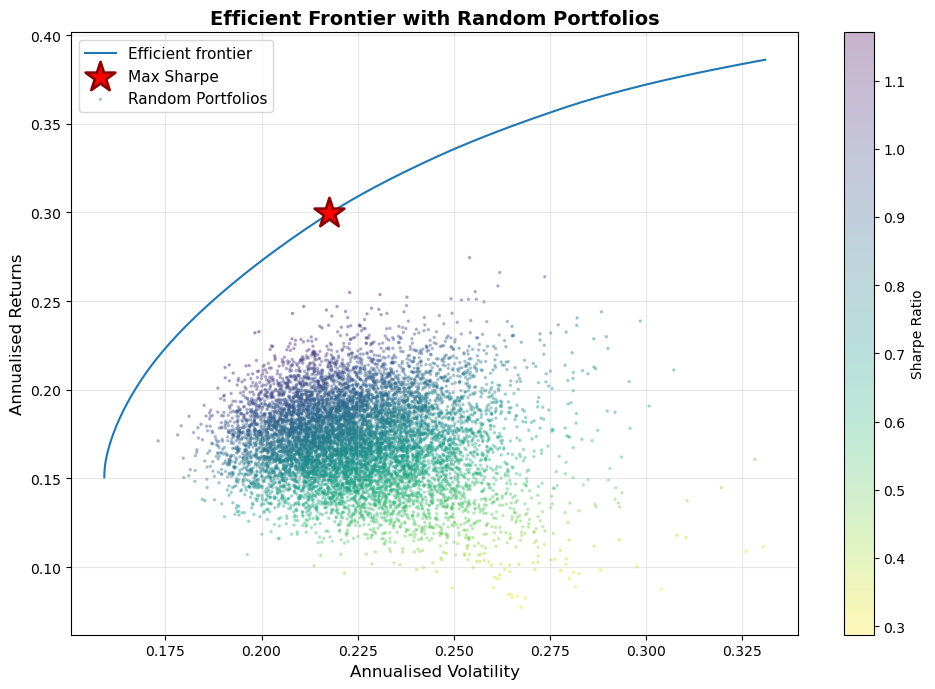

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting
import warnings
warnings.filterwarnings('ignore')

# 读取股票数据
df = pd.read_csv("https://raw.githubusercontent.com/robertmartin8/PyPortfolioOpt/master/tests/resources/stock_prices.csv", 
                 parse_dates=True, index_col="date")

# 计算预期收益和协方差矩阵
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# 创建有效前沿对象
ef = EfficientFrontier(mu, S)

# 创建图表
fig, ax = plt.subplots(figsize=(10, 7))

# 复制对象用于计算最大夏普比率点
ef_max_sharpe = ef.deepcopy()

# 绘制有效前沿曲线
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# 计算并标注最大夏普比率点
ef_max_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=500, c="r", 
          label="Max Sharpe", edgecolors='darkred', linewidths=2, zorder=10)

# 生成随机投资组合（蒙特卡洛模拟）
n_samples = 10000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds

# 绘制随机投资组合散点
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r", 
          s=10, alpha=0.3, label="Random Portfolios")

# 添加颜色条
cbar = plt.colorbar(ax.collections[-1], ax=ax, label='Sharpe Ratio')

# 设置图表属性
ax.set_title("Efficient Frontier with Random Portfolios", fontsize=14, fontweight='bold')
ax.set_xlabel("Annualised Volatility", fontsize=12)
ax.set_ylabel("Annualised Returns", fontsize=12)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

图中展示了投资组合优化的核心要素。黑色虚线为有效前沿曲线，代表各风险水平下的最优组合；彩色散点云是10,000个随机组合，颜色深浅表示夏普比率高低。可以看到，多数随机组合落在有效前沿下方，证明了优化的必要性。红色星号标记最大夏普比率组合，位于有效前沿的切点位置，实现了风险收益的最佳平衡。



正在读取股票数据...
股票数量: 20
数据期间: 1989-12-29 00:00:00 到 2018-04-11 00:00:00

步骤1: 计算有效前沿...
   有效前沿包含 299 个点
   波动率范围: 15.92% - 33.93%
   收益率范围: 15.06% - 38.79%

步骤2: 生成随机投资组合...
   生成 30000 个随机组合...
步骤3: 过滤无效组合（保留在有效前沿下方的点）...
   过滤后保留 28900 个有效组合
   过滤掉 1100 个无效组合

步骤4: 绘制图表...



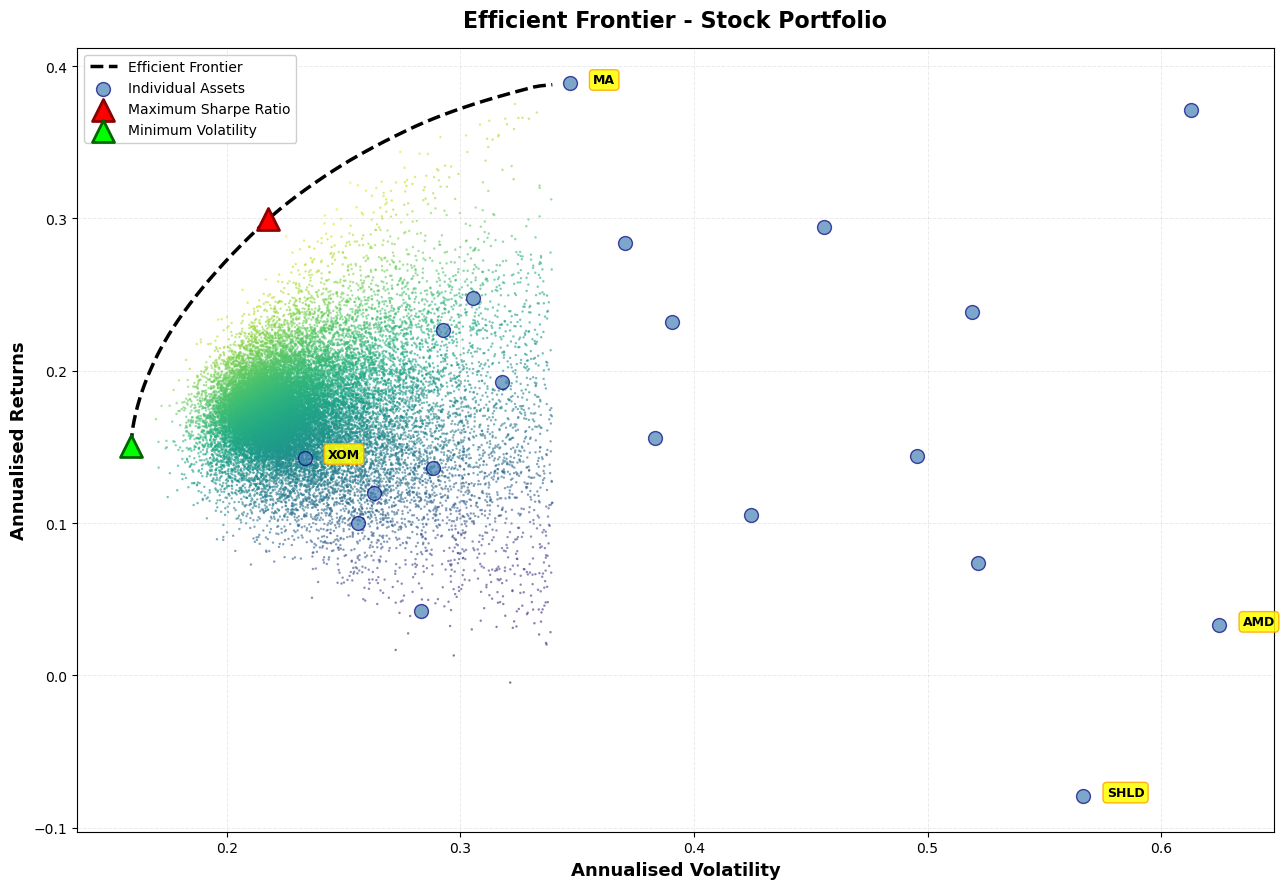

In [37]:
# 更复杂的模拟有效前沿图
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypfopt import EfficientFrontier, risk_models, expected_returns
from scipy.interpolate import interp1d
import warnings
warnings.filterwarnings('ignore')

# 固定随机种子，确保每次运行结果一致
np.random.seed(42)

# ============================================================
# 第一部分：读取数据并计算基本参数
# ============================================================
print("正在读取股票数据...")
df = pd.read_csv("https://raw.githubusercontent.com/robertmartin8/PyPortfolioOpt/master/tests/resources/stock_prices.csv", 
                 parse_dates=True, index_col="date")

# 计算预期收益和协方差矩阵
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

print(f"股票数量: {len(df.columns)}")
print(f"数据期间: {df.index[0]} 到 {df.index[-1]}\n")

# ============================================================
# 第二部分：计算有效前沿
# ============================================================
print("步骤1: 计算有效前沿...")

# 2.1 先找到最小波动率点
ef_min = EfficientFrontier(mu, S)
ef_min.min_volatility()
min_ret, min_vol, _ = ef_min.portfolio_performance()

# 2.2 找到最大收益点
max_possible_return = mu.max()   # 取最大单只股票收益的90%

# 2.3 在最小波动和最大收益之间，计算有效前沿的所有点
n_points = 300  # 有效前沿上的点数
target_returns = np.linspace(min_ret, max_possible_return, n_points)

frontier_volatility = []
frontier_returns = []

for target_ret in target_returns:
    try:
        ef_temp = EfficientFrontier(mu, S)
        ef_temp.efficient_return(target_ret)  # 在给定收益下最小化风险
        ret, vol, _ = ef_temp.portfolio_performance()
        frontier_returns.append(ret)
        frontier_volatility.append(vol)
    except:
        # 有些目标收益可能无法达到
        pass

frontier_volatility = np.array(frontier_volatility)
frontier_returns = np.array(frontier_returns)

print(f"   有效前沿包含 {len(frontier_volatility)} 个点")
print(f"   波动率范围: {frontier_volatility.min():.2%} - {frontier_volatility.max():.2%}")
print(f"   收益率范围: {frontier_returns.min():.2%} - {frontier_returns.max():.2%}\n")

# 2.4 创建插值函数
# 这个函数可以根据任意波动率，返回有效前沿上对应的收益率
frontier_interpolator = interp1d(
    frontier_volatility, 
    frontier_returns, 
    kind='cubic',  # 三次样条插值，曲线平滑
    fill_value='extrapolate',
    bounds_error=False
)

# ============================================================
# 第三部分：生成随机组合散点（核心算法）
# ============================================================
print("步骤2: 生成随机投资组合...")

n_portfolios = 30000  # 要生成的随机组合数量
n_assets = len(mu)

# 3.1 生成随机权重
# 使用Dirichlet分布生成权重，保证所有权重相加为1
# 不同的alpha参数会产生不同的权重分布特征

random_weights = []

# 混合多种alpha值，让散点分布更自然
alphas = [0.1, 0.3, 0.5, 1.0, 2.0, 5.0]  
portfolios_per_alpha = n_portfolios // len(alphas)

for alpha in alphas:
    # alpha越小，权重越集中在少数资产上
    # alpha越大，权重越分散
    weights = np.random.dirichlet(np.ones(n_assets) * alpha, portfolios_per_alpha)
    random_weights.append(weights)

# 合并所有权重
all_weights = np.vstack(random_weights)

# 3.2 计算每个随机组合的收益、波动率、夏普比率
portfolio_returns = []
portfolio_volatilities = []
portfolio_sharpes = []

print(f"   生成 {len(all_weights)} 个随机组合...")

for weights in all_weights:
    # 计算组合收益 = 权重 × 各资产收益
    port_return = np.dot(weights, mu)
    
    # 计算组合波动率 = sqrt(权重^T × 协方差矩阵 × 权重)
    port_volatility = np.sqrt(np.dot(weights, np.dot(S, weights)))
    
    # 计算夏普比率（假设无风险利率为0）
    port_sharpe = port_return / port_volatility
    
    portfolio_returns.append(port_return)
    portfolio_volatilities.append(port_volatility)
    portfolio_sharpes.append(port_sharpe)

portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)
portfolio_sharpes = np.array(portfolio_sharpes)

# 3.3 过滤掉在有效前沿上方的点
print("步骤3: 过滤无效组合（保留在有效前沿下方的点）...")

valid_mask = np.ones(len(portfolio_returns), dtype=bool)

for i in range(len(portfolio_returns)):
    vol = portfolio_volatilities[i]
    ret = portfolio_returns[i]
    
    # 检查波动率是否在有效前沿范围内
    if vol < frontier_volatility.min() or vol > frontier_volatility.max():
        valid_mask[i] = False
        continue
    
    # 使用插值函数找到该波动率下，有效前沿的收益率
    frontier_return_at_vol = frontier_interpolator(vol)
    
    # 如果随机组合的收益 > 有效前沿收益，说明这个点不合理（理论上不存在）
    # 保留一点容差（1.001倍）以应对数值计算误差
    if ret > frontier_return_at_vol:
        valid_mask[i] = False

# 应用过滤
portfolio_returns = portfolio_returns[valid_mask]
portfolio_volatilities = portfolio_volatilities[valid_mask]
portfolio_sharpes = portfolio_sharpes[valid_mask]

print(f"   过滤后保留 {len(portfolio_returns)} 个有效组合")
print(f"   过滤掉 {np.sum(~valid_mask)} 个无效组合\n")

# 3.4 按夏普比率排序（让颜色渐变更平滑）
sort_indices = np.argsort(portfolio_sharpes)
portfolio_returns = portfolio_returns[sort_indices]
portfolio_volatilities = portfolio_volatilities[sort_indices]
portfolio_sharpes = portfolio_sharpes[sort_indices]

# ============================================================
# 第四部分：绘图
# ============================================================
print("步骤4: 绘制图表...\n")

fig, ax = plt.subplots(figsize=(13, 9))

# 4.1 绘制散点云（用夏普比率着色）
scatter = ax.scatter(
    portfolio_volatilities, 
    portfolio_returns,
    c=portfolio_sharpes,  # 颜色根据夏普比率
    cmap='viridis',  # 蓝绿黄渐变
    s=3,  # 点的大小
    alpha=0.6,  # 透明度
    edgecolors='none',
    zorder=1  # 图层顺序，数字小的在下面
)


# 4.2 绘制有效前沿曲线
ax.plot(
    frontier_volatility, 
    frontier_returns,
    'k--',  # 黑色虚线
    linewidth=2.5,
    label='Efficient Frontier',
    zorder=5
)

# 4.3 绘制个股
individual_volatility = np.sqrt(np.diag(S))
individual_returns = mu.values

ax.scatter(
    individual_volatility, 
    individual_returns,
    marker='o',
    s=100,
    color='steelblue',
    alpha=0.7,
    edgecolors='navy',
    linewidths=1,
    label='Individual Assets',
    zorder=6
)

# 4.4 标记最大夏普比率点
ef_maxsharpe = EfficientFrontier(mu, S)
ef_maxsharpe.max_sharpe()
ret_maxsharpe, vol_maxsharpe, sharpe_maxsharpe = ef_maxsharpe.portfolio_performance()

ax.scatter(
    vol_maxsharpe, ret_maxsharpe,
    marker='^',
    s=250,
    color='red',
    edgecolors='darkred',
    linewidths=2,
    label='Maximum Sharpe Ratio',
    zorder=10
)

# 4.5 标记最小波动率点
ax.scatter(
    min_vol, min_ret,
    marker='^',
    s=250,
    color='lime',
    edgecolors='darkgreen',
    linewidths=2,
    label='Minimum Volatility',
    zorder=10
)

# 4.6 标注几个代表性股票
stock_names = df.columns.tolist()
indices_to_label = [
    np.argmax(individual_returns),  # 最高收益
    np.argmin(individual_returns),  # 最低收益
    np.argmax(individual_volatility),  # 最高波动
    np.argmin(individual_volatility)  # 最低波动
]

for idx in indices_to_label[:4]:  # 只标注4个
    ax.text(
        individual_volatility[idx] + 0.01,
        individual_returns[idx],
        stock_names[idx],
        fontsize=9,
        fontweight='bold',
        bbox=dict(
            boxstyle='round,pad=0.3',
            facecolor='yellow',
            edgecolor='orange',
            alpha=0.85,
            linewidth=1
        ),
        zorder=11
    )

# 4.7 美化图表
ax.set_xlabel('Annualised Volatility', fontsize=13, fontweight='bold')
ax.set_ylabel('Annualised Returns', fontsize=13, fontweight='bold')
ax.set_title('Efficient Frontier - Stock Portfolio', fontsize=16, fontweight='bold', pad=15)
ax.legend(fontsize=10, loc='upper left', framealpha=0.95)
ax.grid(True, alpha=0.25, linestyle='--', linewidth=0.7)
ax.set_facecolor('white')

plt.tight_layout()
plt.show()

## 5. 总结

PyPortfolioOpt作为开源的投资组合优化工具包，在实际应用中展现了明显的优势和局限性。从优势来看，该库最大的贡献是将复杂的数学理论转化为简洁的Python接口，用户只需几行代码就能完成从数据输入到权重输出的完整优化流程。其模块化架构设计合理，预期收益估计、风险建模、优化求解和后处理各个环节相对独立，便于用户根据具体需求进行定制化改进。

然而，该库也存在一些不足。首先是对大规模投资组合的支持有限，当资产数量超过数百个时，计算效率明显下降。其次，虽然提供了多种风险模型，但对动态风险建模和时变参数的支持相对薄弱，主要适用于静态的单期优化问题。在实用性方面，库中的某些高级功能（如Black-Litterman模型的观点设定）对新手用户仍然存在一定的学习曲线。总的来说，PyPortfolioOpt更适合学术研究、小规模资产管理和个人投资者使用，对于大型机构的生产环境可能需要额外的性能优化和稳定性改进。尽管如此，其开源特性和持续的社区维护使其成为了解投资组合优化理论和进行初步实践的理想选择。

## 参考文献

张祖冲，2025, [akshare 与 Python：中国金融数据分析与获取的开源首选工具](https://www.lianxh.cn/details/301.html), 连享会 No.1642.

Lopez de Prado, M. (2016). Building diversified portfolios that outperform out-of-sample. *Journal of Portfolio Management*.

Black, F., & Litterman, R. (1990). Asset allocation: combining investor views with market equilibrium. *Goldman Sachs Fixed Income Research*, *115*(1), 7-18.

López de Prado, M. (2016). Building Diversified Portfolios that Outperform Out of Sample. *The Journal of Portfolio Management*, 42(4), 59–69.

Martin, R. A. (2021). PyPortfolioOpt: portfolio optimization in Python. *Journal of Open Source Software*, *6*(61), 3066.
